In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
le=LinearRegression()

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv("/content/TaxiFare.csv")

In [ ]:
df.sample(5)

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
16836,30:00.0,5.30,2010-07-17 21:30:00 UTC,-73.979917,40.685000,-73.985908,40.689852,2
18530,30:00.0,57.33,2014-05-05 14:30:00 UTC,-73.949235,40.741662,-73.974805,40.753860,1
30871,05:00.0,9.30,2010-02-21 01:05:00 UTC,-73.976932,40.681545,-73.998003,40.718255,3
15185,03:00.0,5.50,2013-08-11 11:03:00 UTC,-74.001388,40.741182,-73.993420,40.752230,1
2134,22:55.0,10.50,2013-03-23 01:22:55 UTC,-73.960985,40.760832,-73.984143,40.780242,1


In [ ]:
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [ ]:
df.tail()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
49995,25:15.0,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1
49996,19:18.0,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1
49997,53:00.0,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1
49998,09:00.0,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2
49999,13:14.0,10.9,2010-01-13 08:13:14 UTC,-73.932603,40.763805,-73.932603,40.763805,1


In [ ]:
df.shape

(50000, 8)

array([[<Axes: title={'center': 'amount'}>,
        <Axes: title={'center': 'longitude_of_pickup'}>],
       [<Axes: title={'center': 'latitude_of_pickup'}>,
        <Axes: title={'center': 'longitude_of_dropoff'}>],
       [<Axes: title={'center': 'latitude_of_dropoff'}>,
        <Axes: title={'center': 'no_of_passenger'}>]], dtype=object)

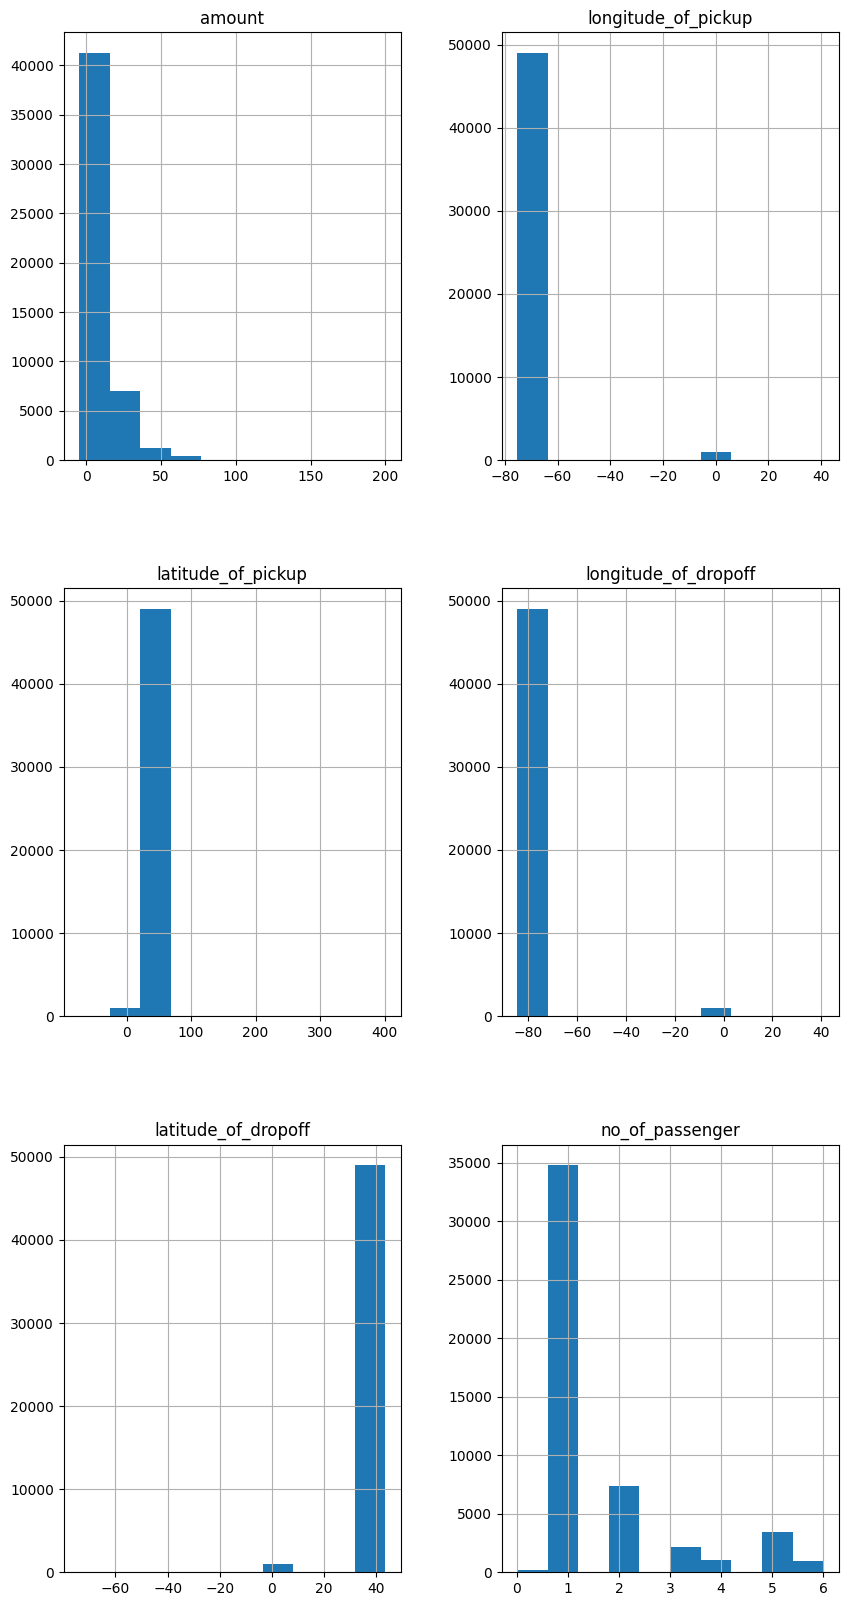

In [ ]:
df.hist(figsize=(10,20))

In [ ]:
df.columns

Index(['unique_id', 'amount', 'date_time_of_pickup', 'longitude_of_pickup',
       'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff',
       'no_of_passenger'],
      dtype='object')

In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
unique_id,50000,3597,26:00.0,457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
amount,50000.0,NaN,NaN,NaN,11.364171,9.685557,-5.0,6.0,8.5,12.5,200.0
date_time_of_pickup,50000,49555,2011-09-03 01:30:00 UTC,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
longitude_of_pickup,50000.0,NaN,NaN,NaN,-72.509756,10.39386,-75.423848,-73.992062,-73.98184,-73.967148,40.783472
latitude_of_pickup,50000.0,NaN,NaN,NaN,39.933759,6.224857,-74.006893,40.73488,40.752678,40.76736,401.083332
longitude_of_dropoff,50000.0,NaN,NaN,NaN,-72.504616,10.40757,-84.654241,-73.991152,-73.980082,-73.963584,40.851027
latitude_of_dropoff,50000.0,NaN,NaN,NaN,39.926251,6.014737,-74.006377,40.734372,40.753372,40.768167,43.41519
no_of_passenger,50000.0,NaN,NaN,NaN,1.66784,1.289195,0.0,1.0,1.0,2.0,6.0


In [ ]:
df.dtypes

unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [ ]:
df.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

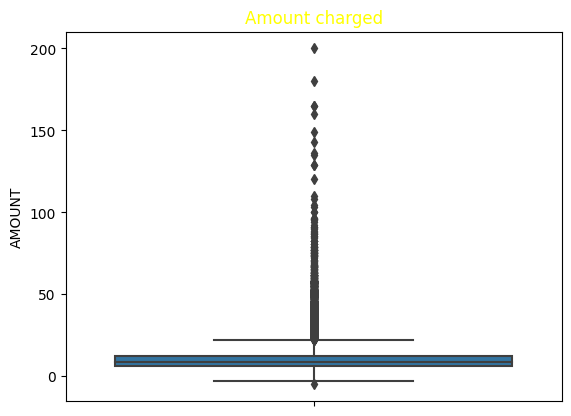

In [ ]:
sns.boxplot(y=df['amount'])
plt.title("Amount charged",color="Yellow")
plt.ylabel("AMOUNT")
plt.show()

<Axes: xlabel='amount', ylabel='count'>

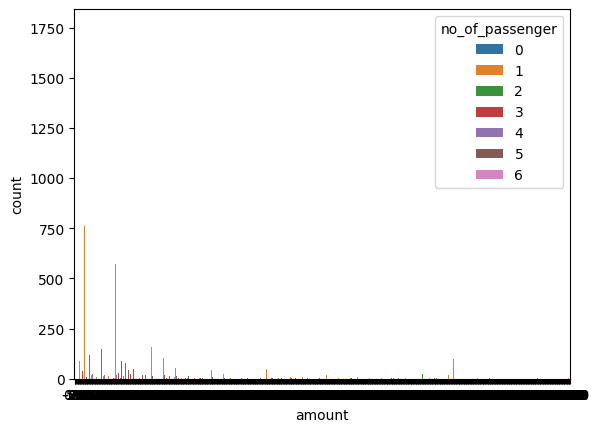

In [ ]:
sns.countplot(x="amount",hue="no_of_passenger",data=df)

In [ ]:
df.dtypes

unique_id                object
amount                  float64
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

<Axes: >

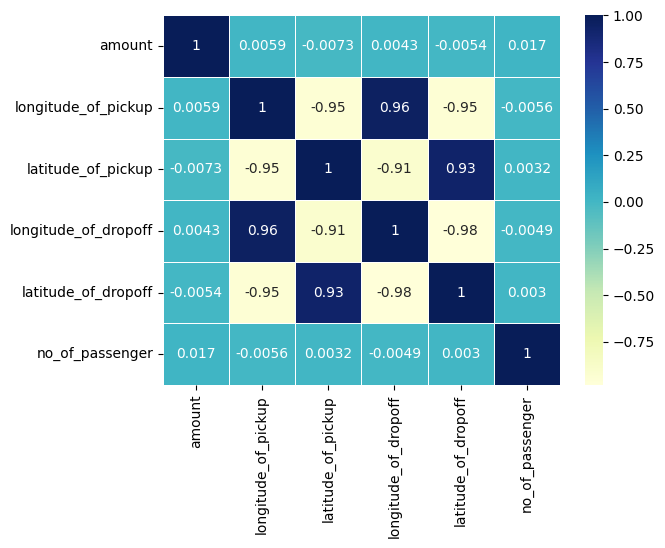

In [ ]:
correlation_mat=df.corr()
sns.heatmap(correlation_mat,annot=True,linewidth=.5,cmap="YlGnBu")

There is a strong relation between longitude of pickup and longitude of dropoff, latitude of pickup and laitude of droppoff

In [ ]:
df.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


<Axes: >

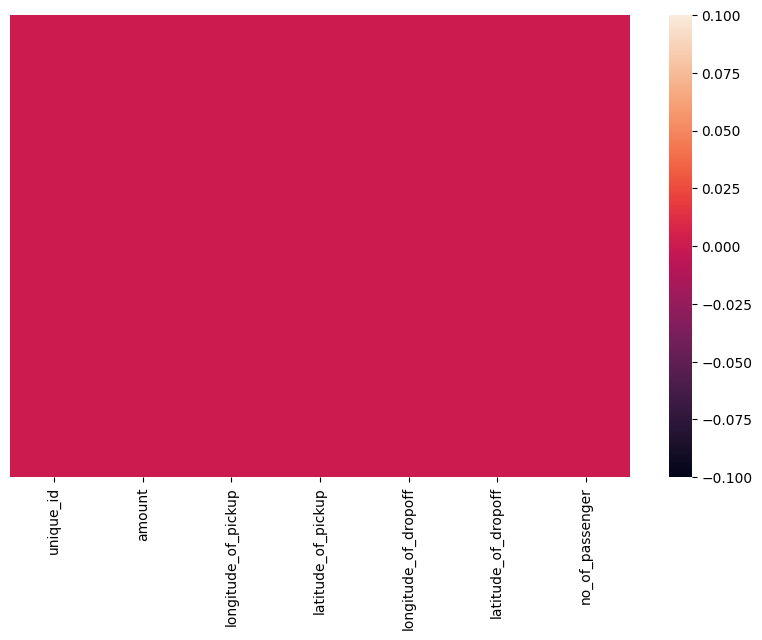

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(),yticklabels=False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   longitude_of_pickup   50000 non-null  float64
 3   latitude_of_pickup    50000 non-null  float64
 4   longitude_of_dropoff  50000 non-null  float64
 5   latitude_of_dropoff   50000 non-null  float64
 6   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 2.7+ MB
